27/06/2025

* Max y min para rango normalizar 
* Clastering DBSCAN con TSNE


Filtrados Por TPL_ID solo obs y acq (3 TPL_ID)

* Parametros no constatantes graficos
* Parametros constantes en Lista

In [1]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['font.size'] = 10

def graficos_dispersion_por_columna(df_sin_error, df_con_error):
    columnas_parametros = [col for col in df_sin_error.columns if col != 'param']
    parametros_constantes = []

    columnas_validas = []
    for col in columnas_parametros:
        std_ok = df_sin_error[col].std()
        std_err = df_con_error[col].std()
        if std_ok == 0 and std_err == 0:
            parametros_constantes.append(col)
        else:
            columnas_validas.append(col)

    print(f"Creando gráficos para {len(columnas_validas)} parámetros NO constantes...")
    print(f"Parámetros constantes (omitidos): {parametros_constantes}")
    print(f"Observaciones sin error: {len(df_sin_error)}")
    print(f"Observaciones con error: {len(df_con_error)}")

    n_params = len(columnas_validas)
    if n_params == 0:
        print("Todos los parámetros son constantes. No se generarán gráficos.")
        return parametros_constantes

    cols = 3
    rows = (n_params + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    fig.suptitle('Dispersión de Parámetros\nRojo: Con Error | Azul: Sin Error', 
                 fontsize=18, fontweight='bold', y=0.995)

    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)

    axes_flat = axes.flatten()

    for i, param in enumerate(columnas_validas):
        ax = axes_flat[i]
        x_sin_error = range(len(df_sin_error))
        x_con_error = range(len(df_con_error))
        y_sin_error = df_sin_error[param]
        y_con_error = df_con_error[param]

        ax.scatter(x_sin_error, y_sin_error, c='blue', alpha=0.6, s=20,
                   label=f'Sin error (n={len(df_sin_error)})', edgecolors='darkred', linewidth=0.3)

        ax.scatter(x_con_error, y_con_error, c='red', alpha=0.6, s=20,
                   label=f'Con error (n={len(df_con_error)})', edgecolors='darkblue', linewidth=0.3)

        ax.set_title(param, fontweight='bold', fontsize=11)
        ax.set_xlabel('Índice de Observación')
        ax.set_ylabel('Valor del Parámetro')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

    for i in range(len(columnas_validas), len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

    return parametros_constantes




Comparando params_MATISSE_hyb_obs.csv
Creando gráficos para 17 parámetros NO constantes...
Parámetros constantes (omitidos): ['SEQ.OPDM.L.WLMAX', 'DET2.INTERFY.VAL', 'DET2.NCOHERENT.VAL', 'TEL.CHOP.POSANG', 'DET1.NINCOHERENT.VAL', 'SEQ.OPDM.N.WLMAX', 'DET1.APOY.VAL', 'DET2.INTERFX.VAL', 'DET2.NINCOHERENT.VAL', 'DET1.SNRLIMIT.VAL', 'DET1.APOTYPE.VAL', 'TEL.CHOP.PVRATIO', 'DET1.NCOHERENT.VAL', 'DET2.WLMINCUT.VAL', 'DET2.SNRLIMIT.VAL', 'DET1.INTERFY.VAL', 'DET1.APOX.VAL', 'DET2.APOY.VAL', 'DET1.INTERFX.VAL']
Observaciones sin error: 1569
Observaciones con error: 43


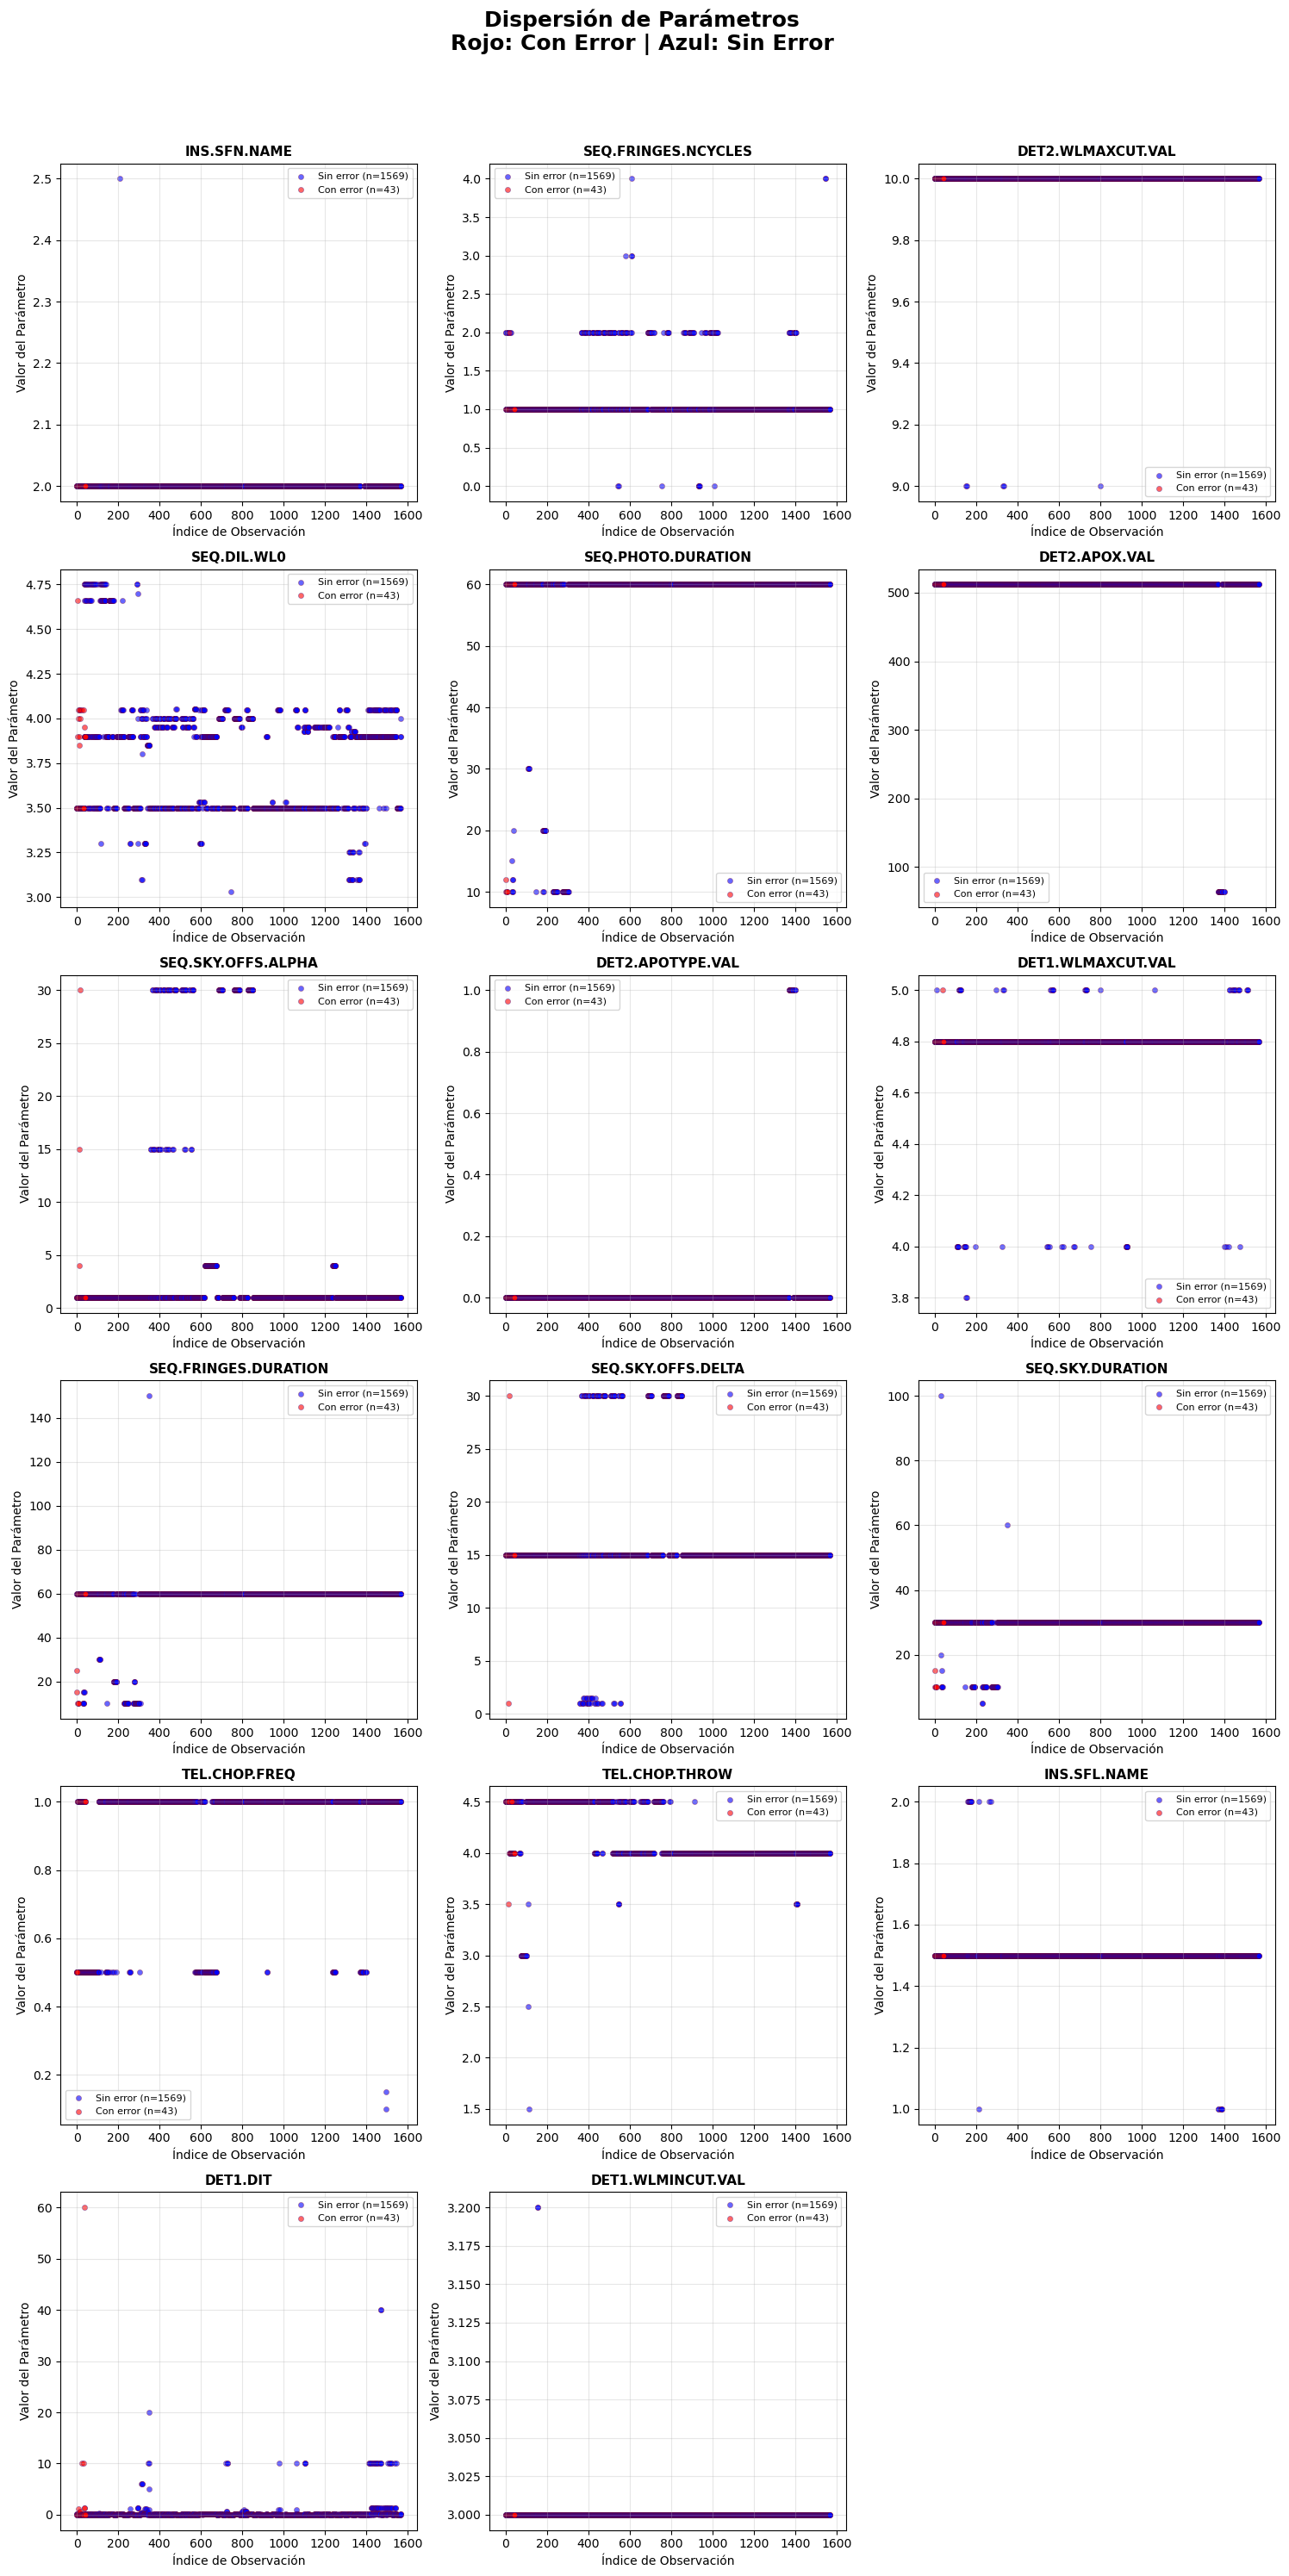

Variables numéricas NO constantes: ['INS.SFN.NAME', 'SEQ.FRINGES.NCYCLES', 'DET2.WLMAXCUT.VAL', 'SEQ.DIL.WL0', 'SEQ.PHOTO.DURATION', 'DET2.APOX.VAL', 'SEQ.SKY.OFFS.ALPHA', 'DET2.APOTYPE.VAL', 'DET1.WLMAXCUT.VAL', 'SEQ.FRINGES.DURATION', 'SEQ.SKY.OFFS.DELTA', 'SEQ.SKY.DURATION', 'TEL.CHOP.FREQ', 'TEL.CHOP.THROW', 'INS.SFL.NAME', 'DET1.DIT', 'DET1.WLMINCUT.VAL']

Comparando params_MATISSE_img_acq.csv
Creando gráficos para 27 parámetros NO constantes...
Parámetros constantes (omitidos): ['SEQ.OPDM.L.WLMAX', 'SEQ.FS.INS.SFN.NAME', 'DET2.INTERFY.VAL', 'DET2.NCOHERENT.VAL', 'DET1.NINCOHERENT.VAL', 'DET2.WLMAXCUT.VAL', 'SEQ.OPDM.N.WLMAX', 'SEQ.DIL.WL0', 'SEQ.ACQ.SKY.DURATION', 'DET1.INTERFX.VAL', 'DET1.APOY.VAL', 'TEL.GS1.MAG', 'DET2.INTERFX.VAL', 'DET2.NINCOHERENT.VAL', 'DET1.SNRLIMIT.VAL', 'SEQ.SKY.OFFS.ALPHA', 'DET1.APOTYPE.VAL', 'TEL.CHOP.PVRATIO', 'SEQ.PUP.TARG.DURATION', 'DET1.NCOHERENT.VAL', 'TEL.TARG.EQUINOX', 'DET2.WLMINCUT.VAL', 'TEL.GS1.ALPHA', 'DET2.SNRLIMIT.VAL', 'COU.AG.EPOCH', 

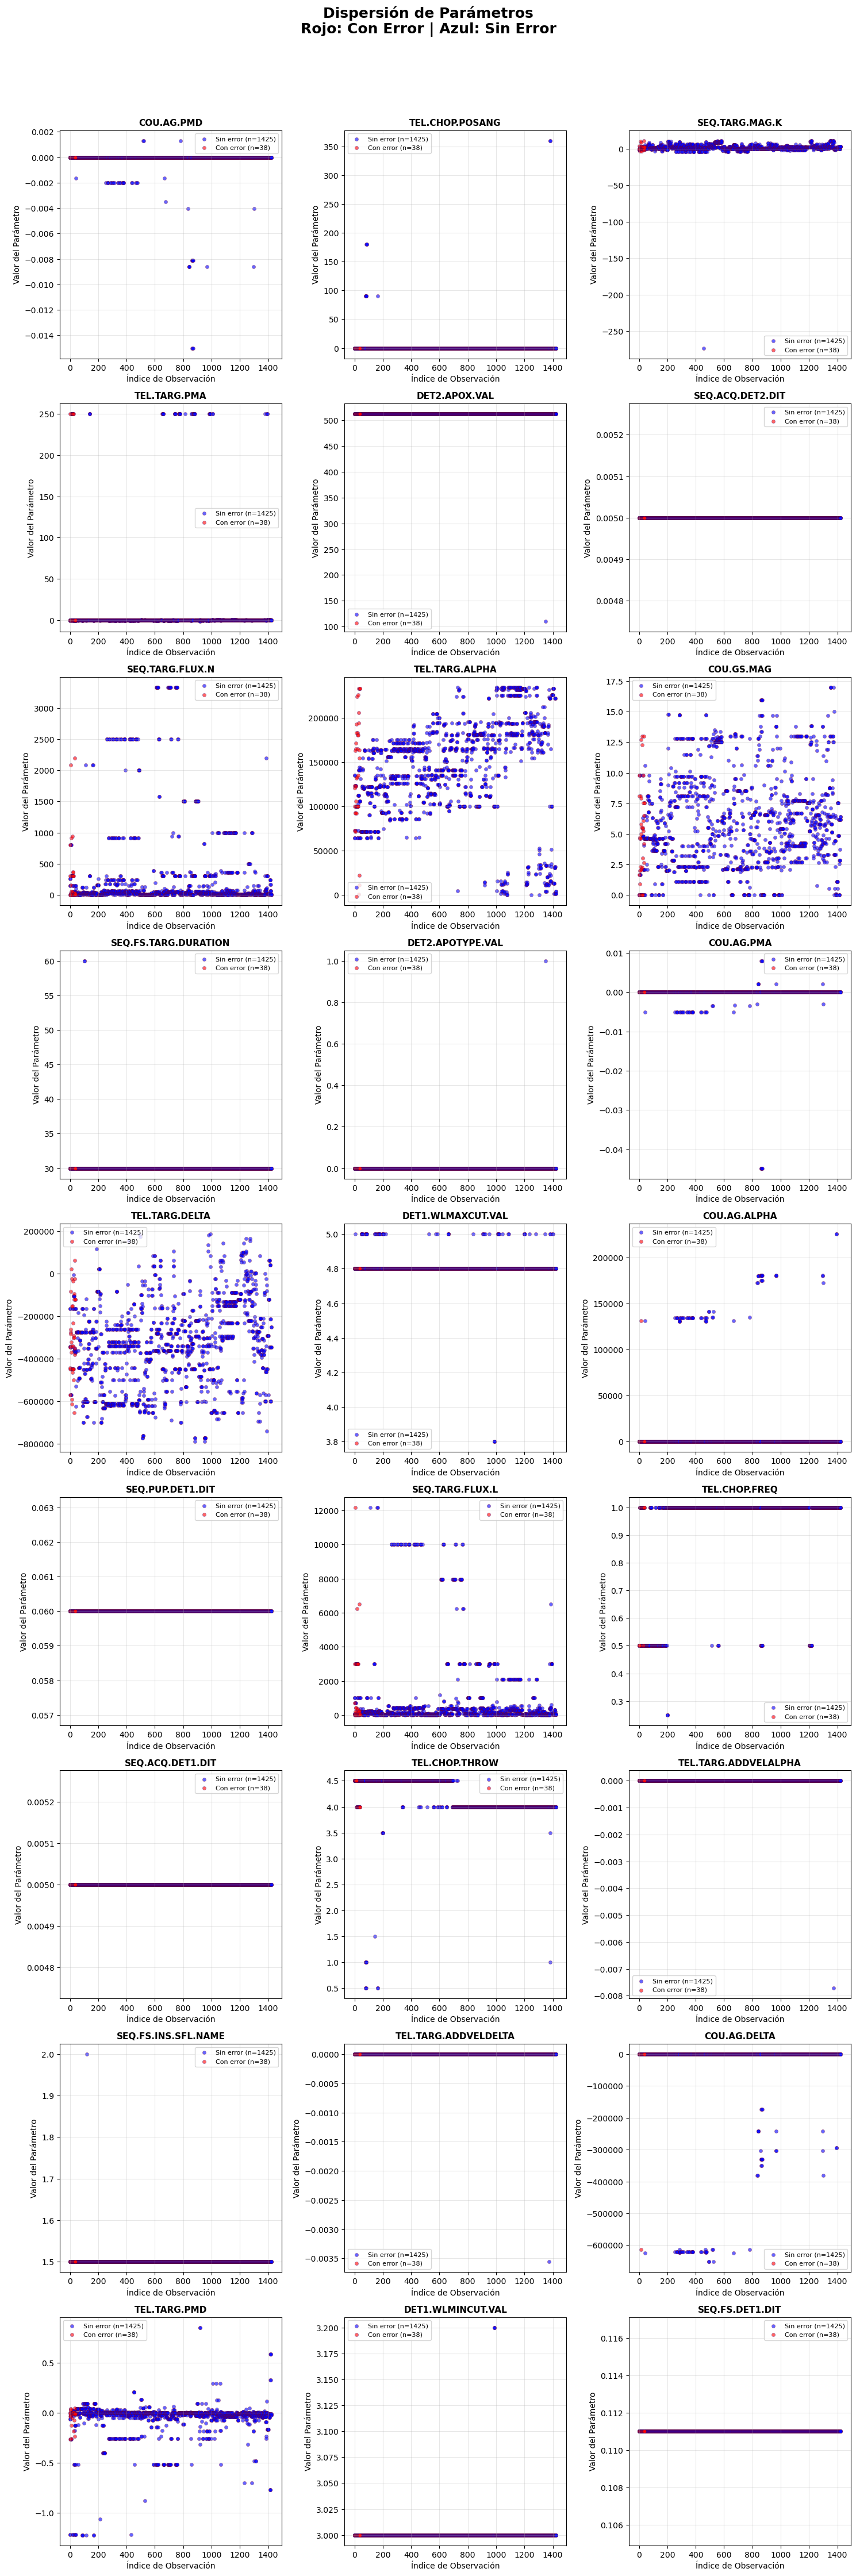

Variables numéricas NO constantes: ['COU.AG.PMD', 'TEL.CHOP.POSANG', 'SEQ.TARG.MAG.K', 'TEL.TARG.PMA', 'DET2.APOX.VAL', 'SEQ.ACQ.DET2.DIT', 'SEQ.TARG.FLUX.N', 'TEL.TARG.ALPHA', 'COU.GS.MAG', 'SEQ.FS.TARG.DURATION', 'DET2.APOTYPE.VAL', 'COU.AG.PMA', 'TEL.TARG.DELTA', 'DET1.WLMAXCUT.VAL', 'COU.AG.ALPHA', 'SEQ.PUP.DET1.DIT', 'SEQ.TARG.FLUX.L', 'TEL.CHOP.FREQ', 'SEQ.ACQ.DET1.DIT', 'TEL.CHOP.THROW', 'TEL.TARG.ADDVELALPHA', 'SEQ.FS.INS.SFL.NAME', 'TEL.TARG.ADDVELDELTA', 'COU.AG.DELTA', 'TEL.TARG.PMD', 'DET1.WLMINCUT.VAL', 'SEQ.FS.DET1.DIT']

Comparando params_MATISSE_img_acq_ft.csv
Creando gráficos para 14 parámetros NO constantes...
Parámetros constantes (omitidos): ['SEQ.OPDM.L.WLMAX', 'DET2.INTERFY.VAL', 'COU.AG.PMD', 'DET2.NCOHERENT.VAL', 'DET1.NINCOHERENT.VAL', 'SEQ.OPDM.N.WLMAX', 'SEQ.DIL.WL0', 'SEQ.ACQ.SKY.DURATION', 'DET1.APOY.VAL', 'TEL.GS1.MAG', 'SEQ.SKY.X', 'DET2.INTERFX.VAL', 'DET2.NINCOHERENT.VAL', 'DET2.APOX.VAL', 'DET1.SNRLIMIT.VAL', 'SEQ.SKY.Y', 'SEQ.SKY.OFFS.ALPHA', 'DET1.AP

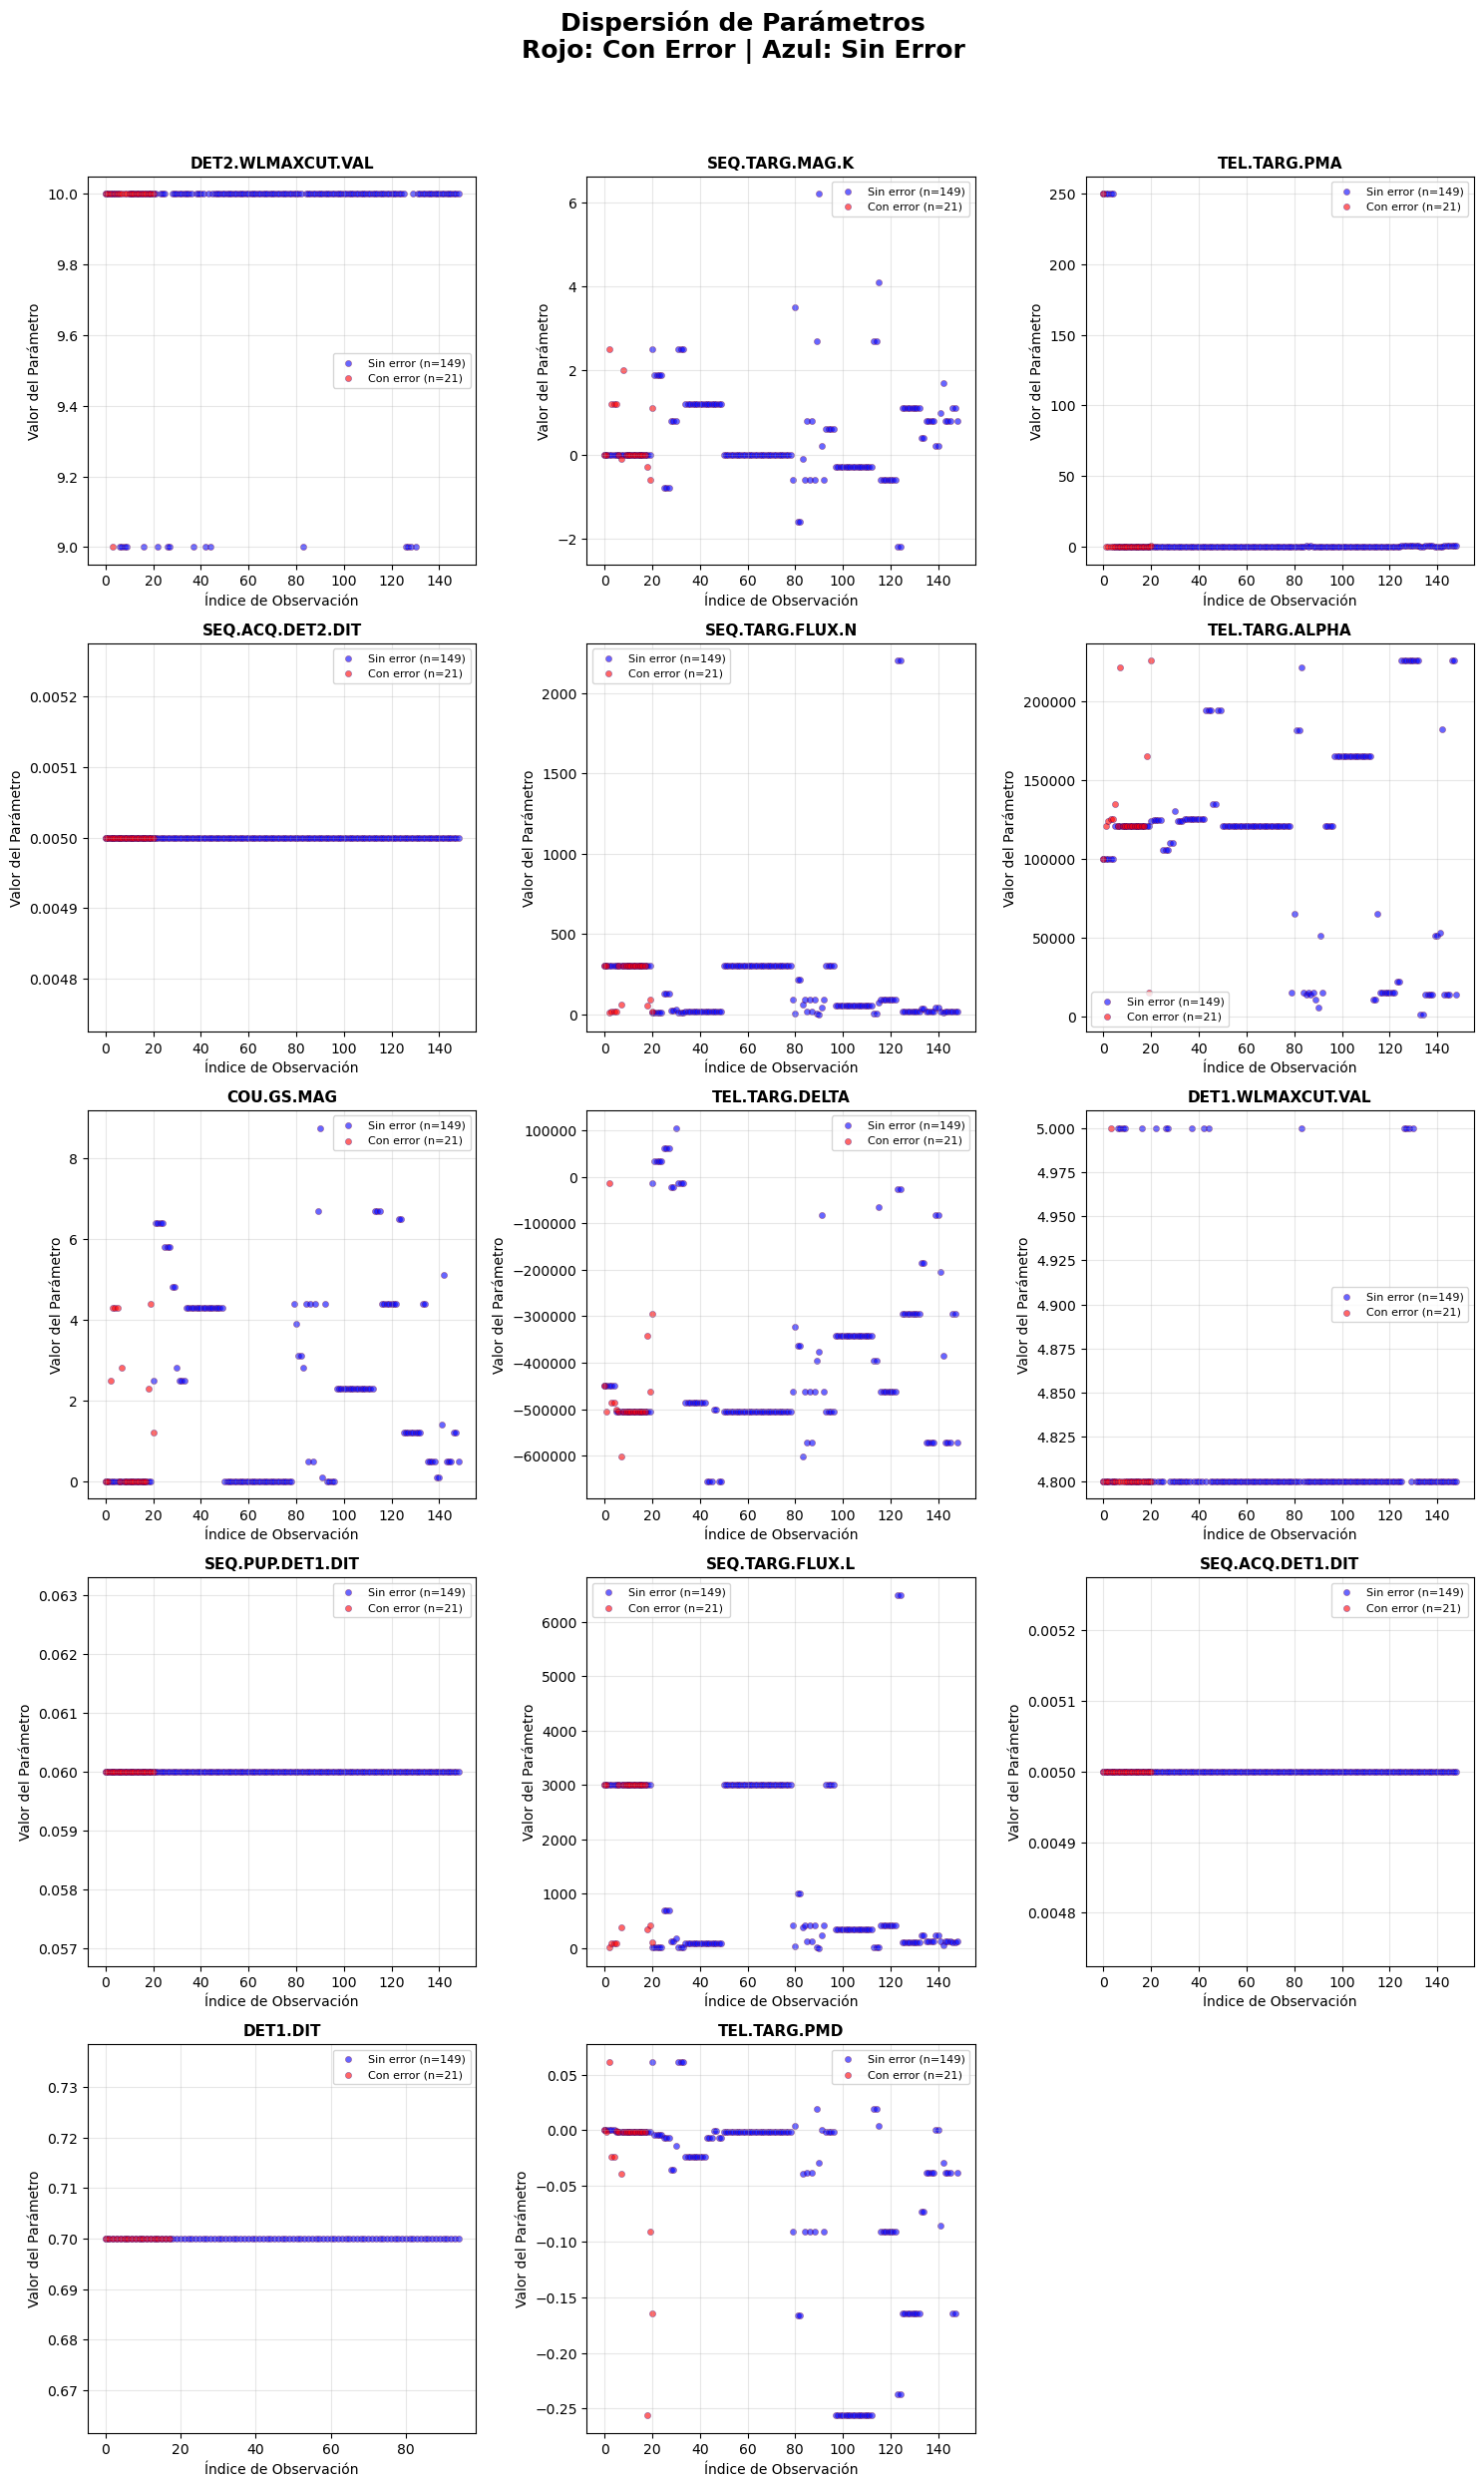

Variables numéricas NO constantes: ['DET2.WLMAXCUT.VAL', 'SEQ.TARG.MAG.K', 'TEL.TARG.PMA', 'SEQ.ACQ.DET2.DIT', 'SEQ.TARG.FLUX.N', 'TEL.TARG.ALPHA', 'COU.GS.MAG', 'TEL.TARG.DELTA', 'DET1.WLMAXCUT.VAL', 'SEQ.PUP.DET1.DIT', 'SEQ.TARG.FLUX.L', 'SEQ.ACQ.DET1.DIT', 'DET1.DIT', 'TEL.TARG.PMD']


In [2]:
import os 
import pandas as pd

dir_ok = "params_por_tpl"
dir_err = "params_por_tpl_Error"

todos_constantes = {}
variables_numericas_validas = {}

for filename in os.listdir(dir_ok):
    if filename.endswith(".csv"):
        path_ok = os.path.join(dir_ok, filename)
        path_err = os.path.join(dir_err, filename)

        if os.path.exists(path_err):
            print(f"\nComparando {filename}")

            df_ok = pd.read_csv(path_ok, index_col=0)
            df_err = pd.read_csv(path_err, index_col=0)
            columns = list(set(df_ok.columns) & set(df_err.columns))
            df_ok = df_ok[columns]
            df_err = df_err[columns]

            constantes = graficos_dispersion_por_columna(df_ok, df_err)
            todos_constantes[filename] = constantes
            columnas_numericas = df_ok.select_dtypes(include=["number"]).columns
            variables_validas = []
            for col in columnas_numericas:
                if df_ok[col].std() != 0 or df_err[col].std() != 0:
                    variables_validas.append(col)

            variables_numericas_validas[filename] = variables_validas

            print(f"Variables numéricas NO constantes: {variables_validas}")
        else:
            print(f"Archivo no encontrado en errores: {filename}") 


Params Normalizados

In [7]:
dir_ok = "params_por_tpl"
dir_err = "params_por_tpl_Error"
out_ok = "params_normalizados_ok"
out_err = "params_normalizados_err"

os.makedirs(out_ok, exist_ok=True)
os.makedirs(out_err, exist_ok=True)

min_max_global = []

for filename in sorted(os.listdir(dir_ok)):
    if filename.endswith(".csv"):
        path_ok = os.path.join(dir_ok, filename)
        path_err = os.path.join(dir_err, filename)
        
        if os.path.exists(path_err):
            df_ok = pd.read_csv(path_ok, index_col=0)
            df_err = pd.read_csv(path_err, index_col=0)
            
            columnas_comunes = list(set(df_ok.columns) & set(df_err.columns))
            df_ok = df_ok[columnas_comunes]
            df_err = df_err[columnas_comunes]
            
            columnas_numericas = df_ok.select_dtypes(include=["number"]).columns
            
            for col in columnas_numericas:
                std_ok = df_ok[col].std()
                std_err = df_err[col].std()
                
                if std_ok == 0 and std_err == 0:
                    continue
                
                min_val = min(df_ok[col].min(), df_err[col].min())
                max_val = max(df_ok[col].max(), df_err[col].max())
                
                if min_val == max_val:
                    continue
                
                df_ok[col] = (df_ok[col] - min_val) / (max_val - min_val)
                df_err[col] = (df_err[col] - min_val) / (max_val - min_val)
                
                min_max_global.append({
                    "archivo": filename,
                    "parametro": col,
                    "min": min_val,
                    "max": max_val,
                    "rango": max_val - min_val,
                    "datos_ok": len(df_ok),
                    "datos_err": len(df_err),
                    "total_datos": len(df_ok) + len(df_err)
                })
            
            df_ok.to_csv(os.path.join(out_ok, filename))
            df_err.to_csv(os.path.join(out_err, filename))
        else:
            print(f"Faltante: {filename}")

df_min_max = pd.DataFrame(min_max_global)
df_min_max.to_csv("resumen_min_max.csv", index=False)
print("Min/Max guardado en resumen_min_max.csv")
print(f"Total archivos procesados: {len(df_min_max['archivo'].unique()) if not df_min_max.empty else 0}")
print(f"Total parámetros normalizados: {len(df_min_max)}")
    

Min/Max guardado en resumen_min_max.csv
Total archivos procesados: 3
Total parámetros normalizados: 50


In [ ]:
df = pd.read_csv("resumen_min_max.csv")

df

,archivo,parametro,min,max,rango,datos_ok,datos_err,total_datos
0,params_MATISSE_hyb_obs.csv,INS.SFN.NAME,2.000000,2.500000,0.500000,1569,43,1612
1,params_MATISSE_hyb_obs.csv,SEQ.FRINGES.NCYCLES,0.000000,4.000000,4.000000,1569,43,1612
2,params_MATISSE_hyb_obs.csv,DET2.WLMAXCUT.VAL,9.000000,10.000000,1.000000,1569,43,1612
3,params_MATISSE_hyb_obs.csv,SEQ.DIL.WL0,3.030000,4.750000,1.720000,1569,43,1612
4,params_MATISSE_hyb_obs.csv,SEQ.PHOTO.DURATION,10.000000,60.000000,50.000000,1569,43,1612
5,params_MATISSE_hyb_obs.csv,DET2.APOX.VAL,64.000000,512.000000,448.000000,1569,43,1612
6,params_MATISSE_hyb_obs.csv,SEQ.SKY.OFFS.ALPHA,1.000000,30.000000,29.000000,1569,43,1612
7,params_MATISSE_hyb_obs.csv,DET2.APOTYPE.VAL,0.000000,1.000000,1.000000,1569,43,1612
8,params_MATISSE_hyb_obs.csv,DET1.WLMAXCUT.VAL,3.800000,5.000000,1.200000,1569,43,1612
9,params_MATISSE_hyb_obs.csv,SEQ.FRINGES.DURATION,10.000000,150.000000,140.000000,1569,43,1612


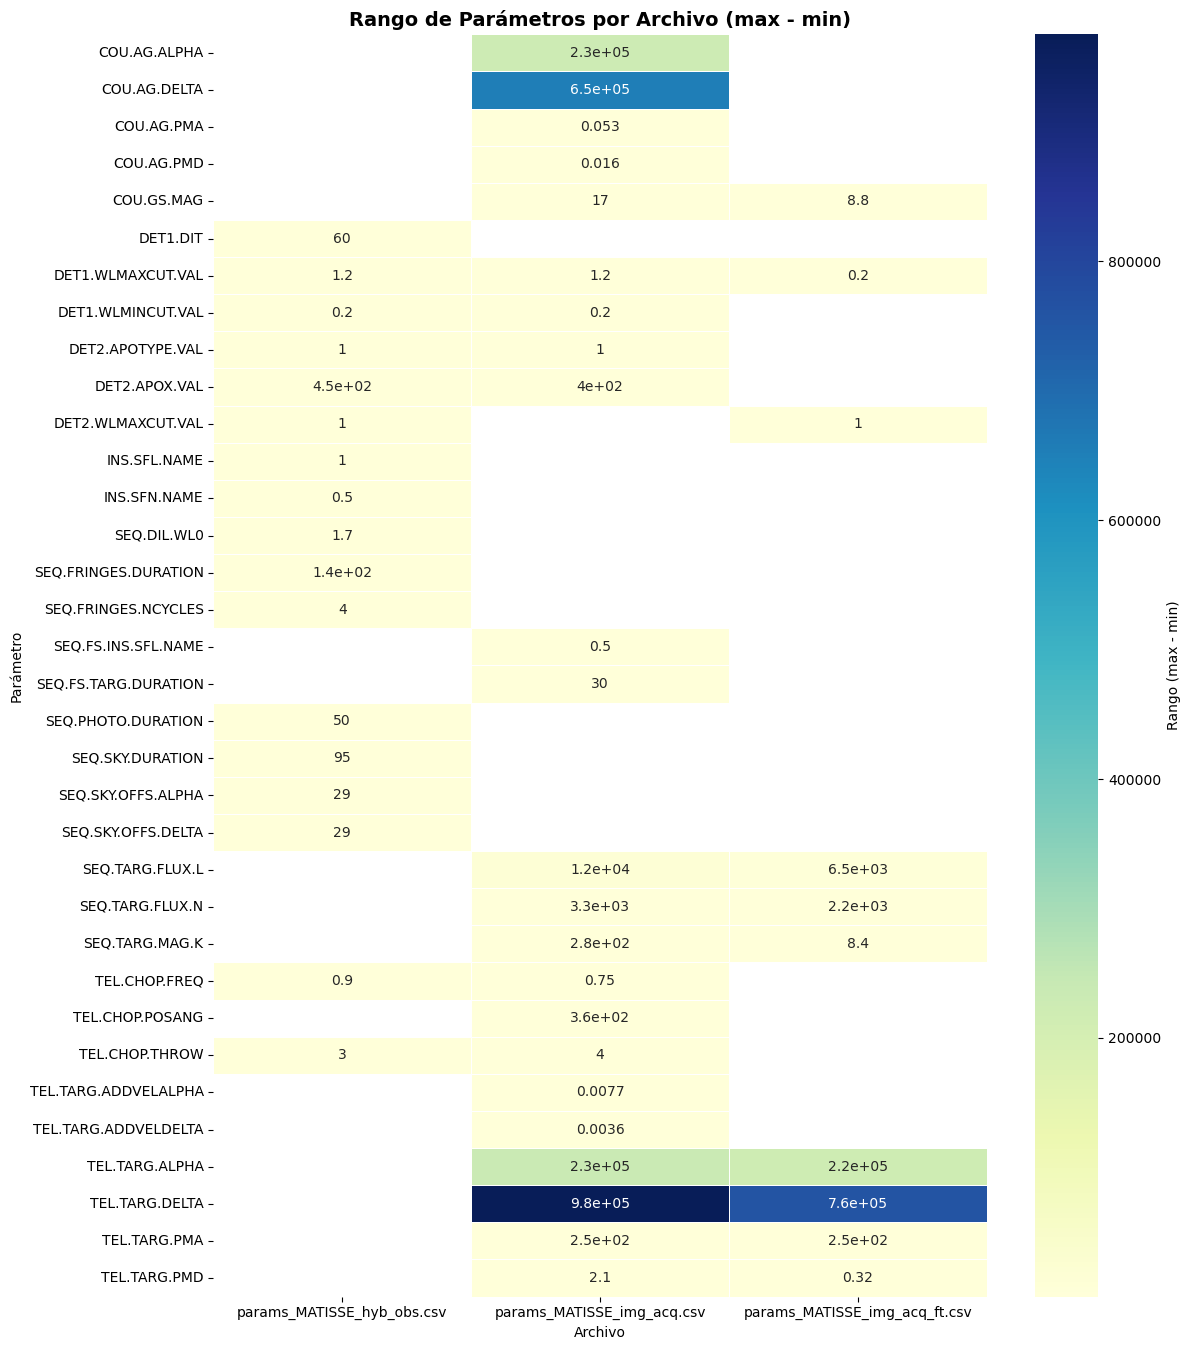

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("resumen_min_max.csv")
pivot = df.pivot(index="parametro", columns="archivo", values="rango")

plt.figure(figsize=(12, max(6, 0.4 * len(pivot))))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Rango (max - min)"})
plt.title("Rango de Parámetros por Archivo (max - min)", fontsize=14, weight='bold')
plt.ylabel("Parámetro")
plt.xlabel("Archivo")
plt.tight_layout()
plt.show()



### Análisis de Clusters con DBSCAN y Visualización t-SNE



In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def aplicar_dbscan_tsne(directorio):
    resultados = {}
    print(f"\nProcesando: {directorio} con visualización t-SNE")

    for archivo in sorted(os.listdir(directorio)):
        if archivo.endswith(".csv"):
            ruta = os.path.join(directorio, archivo)
            df = pd.read_csv(ruta, index_col=0)
            df_numerico = df.select_dtypes(include=["number"])

            df_numerico = df_numerico.dropna(axis=1, how='all')
            df_numerico = df_numerico.loc[:, df_numerico.std() != 0]
            df_numerico = df_numerico.replace([np.inf, -np.inf], np.nan)
            df_numerico = df_numerico.dropna(axis=0, how='any')

            if df_numerico.shape[0] < 5 or df_numerico.shape[1] < 2:
                print(f"{archivo} omitido: pocos datos válidos")
                continue

            X_scaled = StandardScaler().fit_transform(df_numerico)

            dbscan = DBSCAN(eps=0.5, min_samples=5)
            etiquetas = dbscan.fit_predict(X_scaled)

            tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate='auto')
            coords_2d = tsne.fit_transform(X_scaled)

            df_resultado = df_numerico.copy()
            df_resultado['cluster'] = etiquetas
            resultados[archivo] = df_resultado

            n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
            n_ruido = list(etiquetas).count(-1)
            print(f"{archivo}: {n_clusters} clusters, {n_ruido} ruido")

            plt.figure(figsize=(6, 5))
            plt.scatter(coords_2d[:, 0], coords_2d[:, 1], c=etiquetas, cmap='tab10', s=30, alpha=0.7)
            plt.title(f"{archivo}\nClusters: {n_clusters} | Ruido: {n_ruido}", fontweight='bold')
            plt.xlabel("t-SNE 1")
            plt.ylabel("t-SNE 2")
            plt.grid(True, alpha=0.3)
            plt.colorbar(label='Cluster')
            plt.tight_layout()
            plt.show()

    return resultados


Procesando: params_normalizados_err con visualización t-SNE


c:\Users\vosse\anaconda3\envs\IMA539_2025_1\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


params_MATISSE_hyb_obs.csv: 4 clusters, 13 ruido


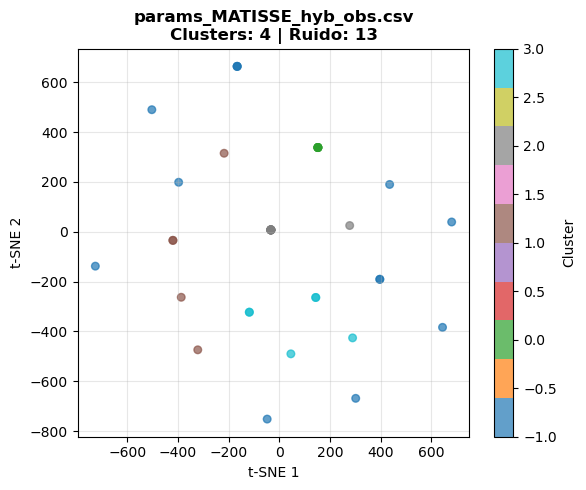

c:\Users\vosse\anaconda3\envs\IMA539_2025_1\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


params_MATISSE_img_acq.csv: 0 clusters, 38 ruido


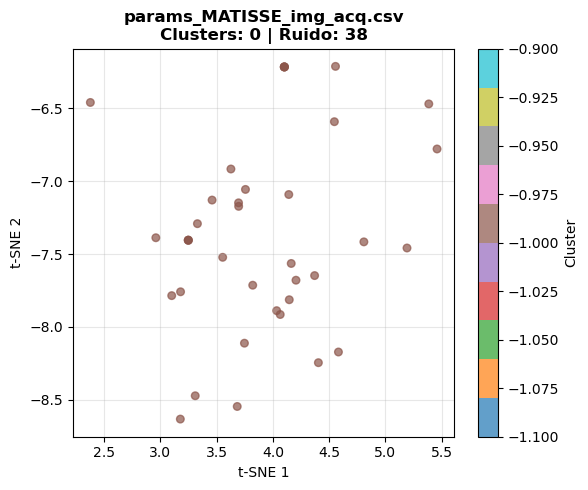

c:\Users\vosse\anaconda3\envs\IMA539_2025_1\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


params_MATISSE_img_acq_ft.csv: 1 clusters, 7 ruido


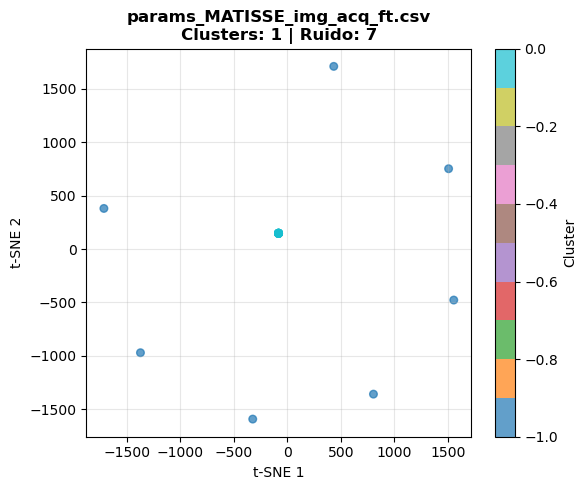


Procesando: params_normalizados_ok con visualización t-SNE


c:\Users\vosse\anaconda3\envs\IMA539_2025_1\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


params_MATISSE_hyb_obs.csv: 32 clusters, 117 ruido


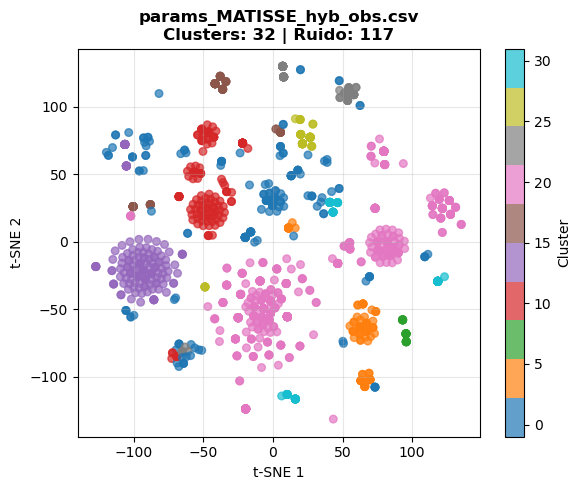

c:\Users\vosse\anaconda3\envs\IMA539_2025_1\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


params_MATISSE_img_acq.csv: 75 clusters, 397 ruido


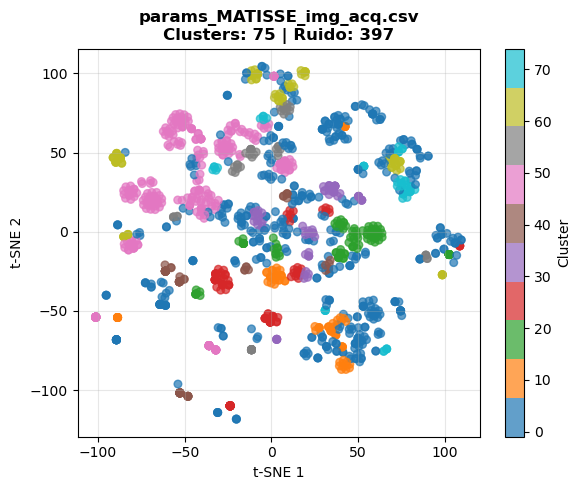

c:\Users\vosse\anaconda3\envs\IMA539_2025_1\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


params_MATISSE_img_acq_ft.csv: 8 clusters, 47 ruido


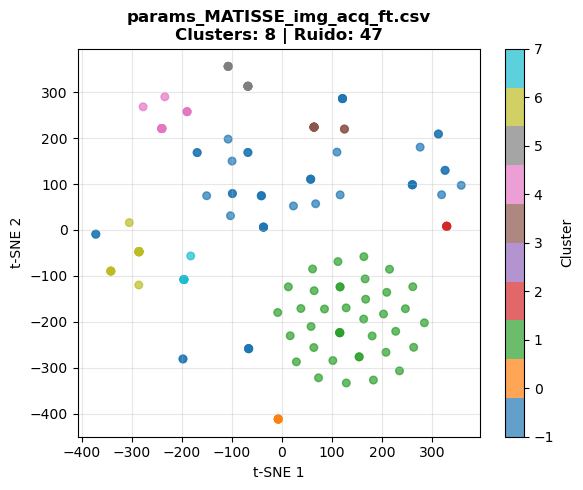

In [11]:
res_err = aplicar_dbscan_tsne("params_normalizados_err")
res_ok  = aplicar_dbscan_tsne("params_normalizados_ok")


In [12]:
os.makedirs("clusterizados_tsne_err", exist_ok=True)
for archivo, df in res_err.items():
    df.to_csv(f"clusterizados_tsne_err/{archivo}")

os.makedirs("clusterizados_tsne_ok", exist_ok=True)
for archivo, df in res_ok.items():
    df.to_csv(f"clusterizados_tsne_ok/{archivo}")


In [13]:
for archivo, df in res_err.items():
    total = len(df)
    ruido = (df['cluster'] == -1).sum()
    print(f"[ERROR] {archivo}: {ruido}/{total} puntos como ruido ({100*ruido/total:.1f}%)")

for archivo, df in res_ok.items():
    total = len(df)
    ruido = (df['cluster'] == -1).sum()
    print(f"[OK]    {archivo}: {ruido}/{total} puntos como ruido ({100*ruido/total:.1f}%)")


[ERROR] params_MATISSE_hyb_obs.csv: 13/40 puntos como ruido (32.5%)
[ERROR] params_MATISSE_img_acq.csv: 38/38 puntos como ruido (100.0%)
[ERROR] params_MATISSE_img_acq_ft.csv: 7/18 puntos como ruido (38.9%)
[OK]    params_MATISSE_hyb_obs.csv: 117/1508 puntos como ruido (7.8%)
[OK]    params_MATISSE_img_acq.csv: 397/1424 puntos como ruido (27.9%)
[OK]    params_MATISSE_img_acq_ft.csv: 47/149 puntos como ruido (31.5%)
